In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)



In [2]:
### x = [x, y, theta, phi]
def f(x): return np.array([np.sin(x[2])*np.cos(x[2])*x[1]**2,
                          -2*np.cos(x[2])/np.sin(x[2])*x[0]*x[1],
                          x[0],
                          x[1]])

## Shooting Method

In [37]:
def var_search (x0a,r1,r2,N):
    
    r1 = r1/np.linalg.norm(r1, ord=2)
    r2 = r2/np.linalg.norm(r2, ord=2)
    
    r3 = (r2-r1)/np.linalg.norm(r1-r2)
    r3 
    
    x0b = np.zeros(4)
    
    x0b[0] = x0a[0]
    x0b[1] = x0a[1]
    if r1[0] < 0:
        x0b[2] = np.arctan(r1[1]/r1[0])-np.pi
    else :
        x0b[2] = np.arctan(r1[1]/r1[0])
    x0b[3] = np.arccos(r1[2])
    
    t = np.linspace(0,x0a[2],N)
    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0b
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    u = np.cos(x[2,-1])*np.sin(x[3,-1])
    v = np.sin(x[2,-1])*np.sin(x[3,-1])
    w = np.cos(x[3,-1])
    rf = np.array([u,v,w])

    return np.linalg.norm(r2-rf, ord=2)

Input points below.

In [60]:
r1 = np.array([0,-1,0])
r2 = np.array([0,0,1])
N = 5001


r1 = r1/np.linalg.norm(r1, ord=2)
r2 = r2/np.linalg.norm(r2, ord=2)

r3 = (r2-r1)/np.linalg.norm(r1-r2)

x0 = np.zeros(3)

x0[0] = np.arcsin(r3[0])
x0[1] = -np.arcsin(r3[2])
x0[2] = np.pi/2

rez = sp.optimize.minimize(var_search, x0, args=(r1,r2,N), method='Nelder-Mead', bounds=[(-np.pi,np.pi),(-np.pi,np.pi),(0,np.pi)])

/tmp/ipykernel_2088/1236168878.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  x0b[2] = np.arctan(r1[1]/r1[0])


In [61]:
def RK4 (f, x0, t):
    
    N = t.size
    x = np.zeros((4,N))
    
    x[:,0] = x0[:]
    
    k = np.zeros((4,4))
    h = t[1]-t[0]

    for i in range(1, t.size):
        
        k[:,0] = f(x[:,i-1])
        
        k[:,1] = f(x[:,i-1] + h/2*k[:,0])
    
        k[:,2] = f(x[:,i-1] + h/2*k[:,1])
    
        k[:,3] = f(x[:,i-1] + h*k[:,2])
    
        x[:,i] = x[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

    return x

In [62]:
if r1[0] < 0:
    theta0 = np.arctan(r1[1]/r1[0])-np.pi
else :
    theta0 = np.arctan(r1[1]/r1[0])
x0c = np.array([rez.x[0], rez.x[1], theta0, np.arccos(r1[2])])
t = np.linspace(0,rez.x[2],N)
s = RK4(f,x0c,t)

/tmp/ipykernel_2088/2830469497.py:4: RuntimeWarning: divide by zero encountered in scalar divide
  theta0 = np.arctan(r1[1]/r1[0])


In [63]:
u = np.cos(s[2])*np.sin(s[3])
v = np.sin(s[2])*np.sin(s[3])
w = np.cos(s[3])

In [64]:
print('Distant point:          [{0:0.3f}, {1:0.3f}, {2:0.3f}]'.format(*r2))
print('Final calculated point: [{0:0.3f}, {1:0.3f}, {2:0.3f}]'.format(u[-1],v[-1],w[-1]))


Distant point:          [0.000, 0.000, 1.000]
Final calculated point: [-0.000, -0.000, 1.000]


Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0, 'Z')

Text(0.5, 0.92, 'Semitransparent Sphere')

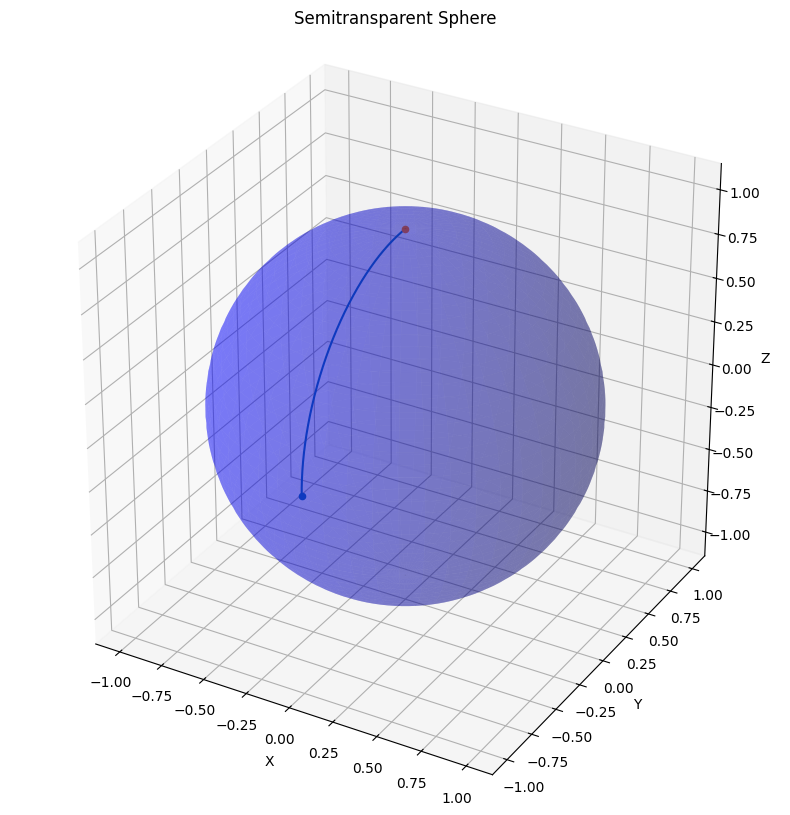

In [65]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Semitransparent Sphere')

ax.plot(u,v,w)
ax.scatter(*r1)
ax.scatter(*r2)

# Show the plot
plt.show()

# Parallel Transport

In [82]:
### x = [x, y, theta, phi], t = s

def g(y,x): ### y = [A0, A1, A2]
    return np.array([-(y[1]*x[0]+np.sin(x[2])**2*y[2]*x[1]),
                     -(-y[0]*x[0]+np.sin(x[2])*np.cos(x[2])*y[2]*x[1]),
                      -(-y[0]*x[1]-np.cos(x[2])/np.sin(x[2])*(y[1]*x[1]+y[2]*x[0]))])
    

A0 = np.array([0,0,1])

transport = np.zeros((A0.size,N))

transport[:,0] = A0[:]

k = np.zeros((A0.size,4))
h = t[1]-t[0]

for i in range(1, N):
    
    k[:,0] = g(transport[:,i-1], s[:,i-1])
    
    k[:,1] = g(transport[:,i-1] + h/2*k[:,0], (s[:,i]+s[:,i-1])/2)

    k[:,2] = g(transport[:,i-1] + h/2*k[:,1], (s[:,i]+s[:,i-1])/2)

    k[:,3] = g(transport[:,i-1] + h*k[:,2], s[:,i])

    transport[:,i] = transport[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

In [100]:
### x = [x, y, theta, phi], t = s

def g(y,x): ### y = [A0, A1, A2]
    return np.array([-(y[1]*x[0]+np.cos(x[2])**2*y[2]*x[1]),
                     -(-y[0]*x[0]+np.sin(x[2])**2*y[2]*x[1]),
                      -(-y[0]*x[1]-np.cos(x[2])/np.sin(x[2])*(y[1]*x[1]+y[2]*x[0]))])
    

A0 = np.array([0,0,1])

transport = np.zeros((A0.size,N))

transport[:,0] = A0[:]

k = np.zeros((A0.size,4))
h = t[1]-t[0]

for i in range(1, N):
    
    k[:,0] = g(transport[:,i-1], s[:,i-1])
    
    k[:,1] = g(transport[:,i-1] + h/2*k[:,0], (s[:,i]+s[:,i-1])/2)

    k[:,2] = g(transport[:,i-1] + h/2*k[:,1], (s[:,i]+s[:,i-1])/2)

    k[:,3] = g(transport[:,i-1] + h*k[:,2], s[:,i])

    transport[:,i] = transport[:,i-1] + h/6*(k[:,0]+2*k[:,1]+2*k[:,2]+k[:,3])

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0, 'Z')

Text(0.5, 0.92, 'Semitransparent Sphere')

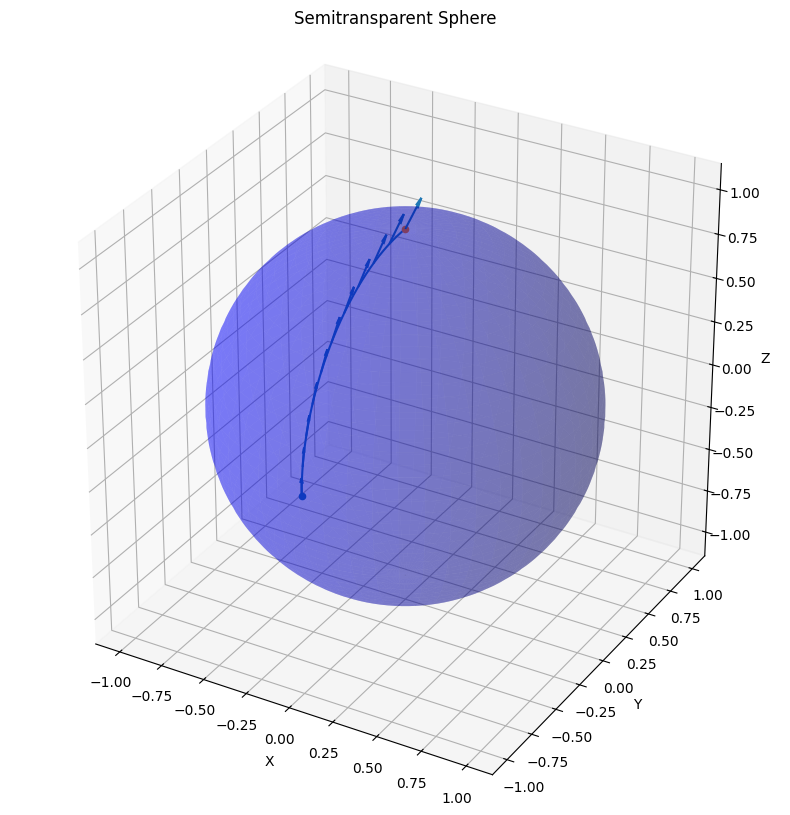

In [101]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Semitransparent Sphere')

ax.plot(u,v,w)
ax.quiver(u[::500],v[::500],w[::500],transport[0][::500],transport[1][::500],transport[2][::500], length=0.1)
ax.scatter(*r1)
ax.scatter(*r2)

# Show the plot
plt.show()

In [102]:
s[:,::500]
transport[:,::500]

array([[-1.07030728e-04, -1.05713046e-04, -1.01792442e-04,
        -9.53654534e-05, -8.65903274e-05, -7.56831300e-05,
        -6.29124239e-05, -4.85926557e-05, -3.30764143e-05,
        -1.67457485e-05, -2.76023523e-09],
       [-8.97065277e-01, -8.97065277e-01, -8.97065278e-01,
        -8.97065279e-01, -8.97065281e-01, -8.97065283e-01,
        -8.97065285e-01, -8.97065287e-01, -8.97065288e-01,
        -8.97065289e-01, -8.97065290e-01],
       [-1.57079633e+00, -1.57081499e+00, -1.57083320e+00,
        -1.57085049e+00, -1.57086646e+00, -1.57088069e+00,
        -1.57089285e+00, -1.57090263e+00, -1.57090980e+00,
        -1.57091417e+00, -1.57091564e+00],
       [ 1.57079633e+00,  1.41371927e+00,  1.25664222e+00,
         1.09956517e+00,  9.42488115e-01,  7.85411062e-01,
         6.28334008e-01,  4.71256953e-01,  3.14179899e-01,
         1.57102844e-01,  2.57891768e-05]])

array([[0.00000000e+00, 1.46285703e-06, 5.74329317e-06, 1.25212275e-05,
        2.12777570e-05, 3.13165978e-05, 4.17930666e-05, 5.17495980e-05,
        6.01565603e-05, 6.59569390e-05, 6.81133100e-05],
       [0.00000000e+00, 1.57077044e-01, 3.14153961e-01, 4.71230435e-01,
        6.28305956e-01, 7.85379854e-01, 9.42451339e-01, 1.09951955e+00,
        1.25658360e+00, 1.41364265e+00, 1.57069599e+00],
       [1.00000000e+00, 9.99999769e-01, 9.99998171e-01, 9.99993916e-01,
        9.99985872e-01, 9.99973128e-01, 9.99955061e-01, 9.99931382e-01,
        9.99902174e-01, 9.99867913e-01, 9.99829476e-01]])

##### np.arctan(r1[1]/r1[0])

## Finite Difference Scheme

$x$ is a $2\times n$ array representing the interior points. $X$ is the full $2\times n+2$ array with proper boundary values. 
$$
f(\vec{x}) = 

In [17]:
def finite_difference(x,c): ### needs to be passed interior points only because the boundary values are invariant
                            ### X gets constructed within the routine. Thus, boundary values must be passed as constants.
                            ### always parameterize around 1, so h = 1/X.size
                            ### c = [[theta_i, theta_f],[phi_i,phi_f]]
                            ### x = [[theta_i, phi_i]]
    y = np.zeros(x.size)
    X0 = np.zeros((2,int(x.size/2)+2))
    X = np.zeros((2,int(x.size/2)+2))
    X0[:,0] = c[:,0]
    X0[:,-1] = c[:,-1]
    X0[:,1:-1] = np.array([x[0:int(x.size/2)],x[int(x.size/2):]])
    h = 1/X.size
    for i in range(1,int(x.size/2)+1):
        X[:,i] = func(X0[:,i-1:i+2],h)
    y[0:int(x.size/2)] = X[0,1:-1]
    y[int(x.size/2):] = X[1,1:-1]
    return y

def func(x,h):
    return np.array([(x[0,0]-2*x[0,1]+x[0,2])/h**2-np.sin(x[0,1])*np.cos(x[0,1])*((x[1,2]-x[1,0])/2/h)**2,
                     np.sin(x[0,1])*(x[1,0]-2*x[1,1]+x[1,2])/h**2+2*np.cos(x[0,1])*((x[0,2]-x[0,0])/2/h)*((x[1,2]-x[1,0])/2/h)])

In [18]:
r1 = np.array([0,-1,0])
r2 = np.array([1,0,0])
r1 = r1/np.linalg.norm(r1, ord=2)
r2 = r2/np.linalg.norm(r2, ord=2)
r2
c = np.array([[0, 0],
              [np.arccos(r1[2]), np.arccos(r2[2])]])
if r1[0] < 0:
    c[0,0] = np.arctan(r1[1]/r1[0])-np.pi
else :
    c[0,0] = np.arctan(r1[1]/r1[0])
if r2[0] < 0:
    c[0,1] = np.arctan(r2[1]/r2[0])-np.pi
else :
    c[0,1] = np.arctan(r2[1]/r2[0])


n = 50                          ### interior points
t = np.linspace(0,1,n)
u0 = r1[0]*(1-t)+r2[0]*t
v0 = r1[1]*(1-t)+r2[1]*t
w0 = r1[2]*(1-t)+r2[2]*t

x0 = np.zeros((n*2-4))

x0[0:n-2] = np.where(u0<0,np.arctan(v0/u0)-np.pi,np.arctan(v0/u0))[1:-1]
x0[n-2:] = np.arccos(w0)[1:-1]

array([1., 0., 0.])

/tmp/ipykernel_2088/2764089141.py:11: RuntimeWarning: divide by zero encountered in scalar divide
  c[0,0] = np.arctan(r1[1]/r1[0])
/tmp/ipykernel_2088/2764089141.py:26: RuntimeWarning: divide by zero encountered in divide
  x0[0:n-2] = np.where(u0<0,np.arctan(v0/u0)-np.pi,np.arctan(v0/u0))[1:-1]


In [19]:
rez = sp.optimize.root(finite_difference, x0, args=(c), method='hybr')
rez

 message: The solution converged.
 success: True
  status: 1
     fun: [-2.220e-12  2.220e-12 ...  0.000e+00  0.000e+00]
       x: [-1.539e+00 -1.507e+00 ...  1.571e+00  1.571e+00]
  method: hybr
    nfev: 101
    fjac: [[-8.944e-01  4.472e-01 ...  0.000e+00  0.000e+00]
           [-3.586e-01 -7.171e-01 ...  0.000e+00  0.000e+00]
           ...
           [ 0.000e+00  0.000e+00 ... -7.283e-02  9.613e-01]
           [ 0.000e+00  0.000e+00 ... -2.540e-01 -2.756e-01]]
       r: [ 2.236e+04 -1.789e+04 ...  4.153e+02 -6.301e+01]
     qtf: [ 2.120e-06 -4.715e-06 ...  0.000e+00  0.000e+00]

In [20]:
x = rez.x

X = np.zeros((2,int(x.size/2)+2))
X[:,0] = c[:,0]
X[:,-1] = c[:,-1]
X[:,1:-1] = np.array([x[0:int(x.size/2)],x[int(x.size/2):]])
u = np.cos(X[0])*np.sin(X[1])
v = np.sin(X[0])*np.sin(X[1])
w = np.cos(X[1])
u[-1]
v[-1]
w[-1]

1.0

0.0

6.123233995736766e-17

Text(0.5, 0, 'X')

Text(0.5, 0.5, 'Y')

Text(0.5, 0, 'Z')

Text(0.5, 0.92, 'Semitransparent Sphere')

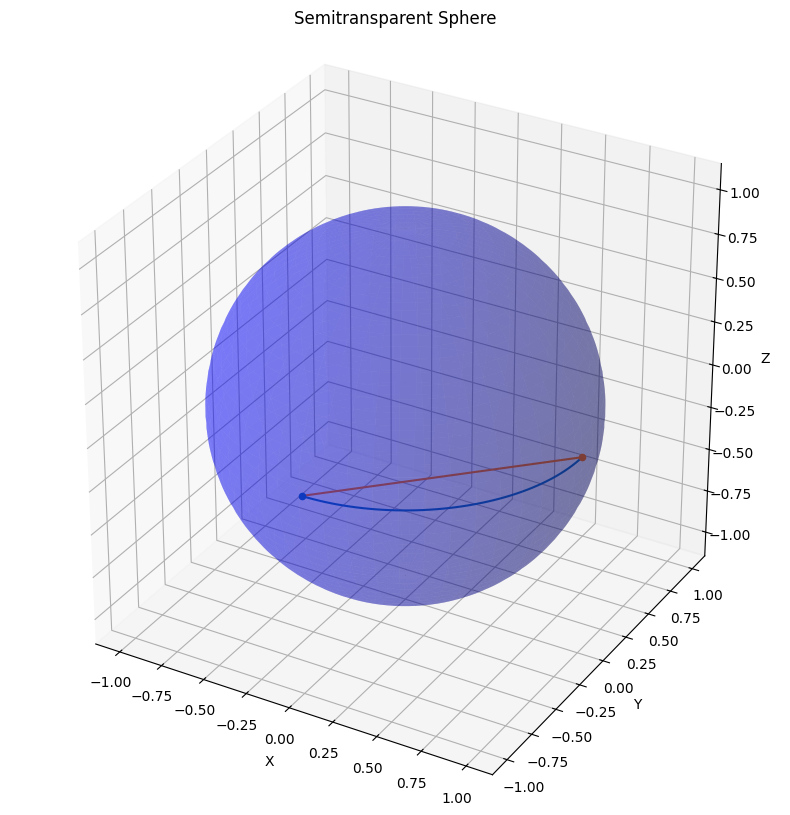

In [21]:
# Function to generate a sphere
def sphere(radius=1, center=(0, 0, 0), resolution=100):
    u = np.linspace(0, 2 * np.pi, resolution)
    v = np.linspace(0, np.pi, resolution)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return x, y, z

# Create the figure and the 3D axis
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Generate the sphere data
x, y, z = sphere()

# Plot the surface of the sphere
ax.plot_surface(x, y, z, color='b', alpha=0.3)  # Set alpha for transparency

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio for all axes

# Labels and title (optional)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Semitransparent Sphere')

ax.plot(u,v,w)
ax.plot(u0,v0,w0)
ax.scatter(*r1)
ax.scatter(*r2)

# Show the plot
plt.show()

In [22]:
### Newton's method (probably needs reworking)
# for i in range(50):

#     y0 = finite_difference(x0,c)
#     yn = np.zeros((len(y0),len(y0)))
#     h = 0.01
#     for j in range(len(y0)):
        
#         h_arr = np.zeros(len(y0))
#         h_arr[j] = h
#         yn[:,j] = (finite_difference(x0+h_arr,c)-y0)/(h)
#     J = yn
#     J
#     x0 = x0-J**(-1)@y0
    
# x0
# finite_difference(x0,c)

In [ ]:
B

# 